<a href="https://colab.research.google.com/github/ASHOK26052006/My-Internship-/blob/main/Copy_of_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algorithm In Machine Learning

1. [What is Clustering?](#1)
1. [What is K-Means Algorithm?](#2)
1. [How does the K-Means Algorithm Work?](#3)
1. [How to choose the value of "K number of clusters" in K-means Clustering?](#4)
1. [Implementation with Code](#5)

### <span id="1"></span>  1. What is Clustering?

#### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

Let’s kick things off with a simple example. A bank wants to give credit card offers to its customers. Currently, they look at the details of each customer and based on this information, decide which offer should be given to which customer.

Now, the bank can potentially have millions of customers. Does it make sense to look at the details of each customer separately and then make a decision? Certainly not! It is a manual process and will take a huge amount of time.

So what can the bank do? One option is to segment its customers into different groups. For instance, the bank can group the customers based on their income:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-07-15-19-27.png" class="center">


### <span id="2"></span>  2. What is K-Means Algorithm?

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" class="center">

### <span id="3"></span>  3. How does the K-Means Algorithm Work?

The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

### <span id="4"></span>  4. How to choose the value of "K number of clusters" in K-means Clustering?

WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2

To find the optimal value of clusters, the elbow method follows the below steps:

It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).

For each value of K, calculates the WCSS value.

Plots a curve between calculated WCSS values and the number of clusters K.

The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

### <span id="5"></span>  5. Implementation with Code

#### Import Necessary Libraries

In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_dataset.xlsx to customer_dataset.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

#### Import Dataset

In [3]:
df = pd.read_excel('customer_dataset.xlsx')

In [4]:
df.head()

,CustomerID,Name,Gender,Age,Annual Income ($1000s),Spending Score (1–100)
0,1,Charlotte,Female,18,81,65
1,2,John,Female,41,51,49
2,3,Charlotte,Male,41,141,85
3,4,Amelia,Male,40,81,49
4,5,Diana,Female,43,108,9


In [5]:
#### Rename Columns
df.rename(columns={'Gender':'gender', 'Age':'age','Annual Income ($1000s)':'income','Spending Score (1–100)':'score'}, inplace=True)

In [6]:
df

,CustomerID,Name,gender,age,income,score
0,1,Charlotte,Female,18,81,65
1,2,John,Female,41,51,49
2,3,Charlotte,Male,41,141,85
3,4,Amelia,Male,40,81,49
4,5,Diana,Female,43,108,9
5,6,John,Male,54,121,57
6,7,John,Male,32,30,43
7,8,William,Female,29,107,77
8,9,Robert,Female,30,87,63
9,10,William,Male,30,135,29


In [7]:
df.shape

(50, 6)

#### Checking Null Value

In [8]:
df.isnull().sum()

,0
CustomerID,0
Name,0
gender,0
age,0
income,0
score,0


In [9]:
df = df.drop('CustomerID', axis = 1)

In [10]:
df

,Name,gender,age,income,score
0,Charlotte,Female,18,81,65
1,John,Female,41,51,49
2,Charlotte,Male,41,141,85
3,Amelia,Male,40,81,49
4,Diana,Female,43,108,9
5,John,Male,54,121,57
6,John,Male,32,30,43
7,William,Female,29,107,77
8,Robert,Female,30,87,63
9,William,Male,30,135,29


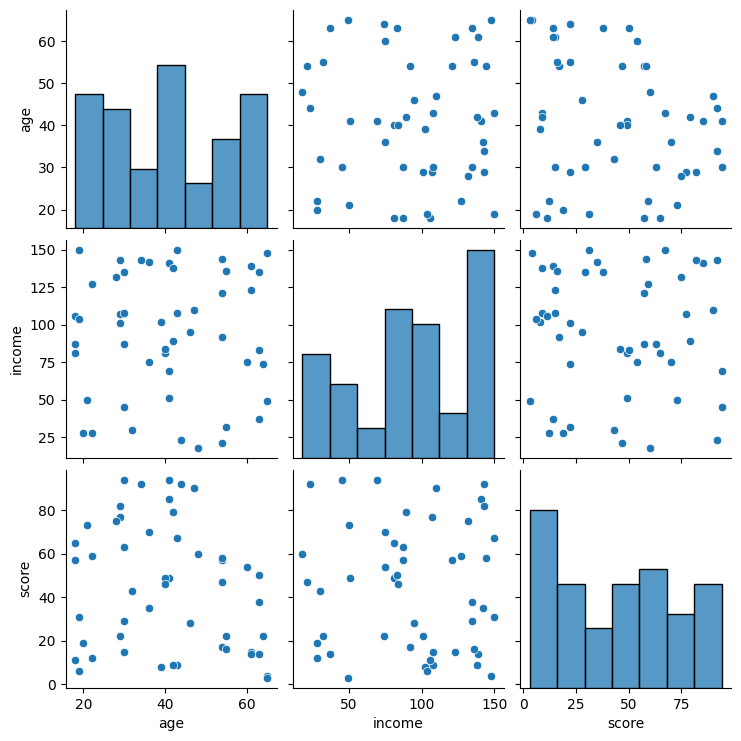

In [11]:
seaborn.pairplot(df[['age','income','score']])

In [12]:
x = df.drop(['Name','score','gender'], axis = 1)

In [13]:
y = df['score']
y

,score
0,65
1,49
2,85
3,49
4,9
5,57
6,43
7,77
8,63
9,29


In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans(n_clusters = 5) # k = 5

In [16]:
kmeans = kmeans.fit(df[['income','score']])

In [17]:
kmeans.cluster_centers_

array([[ 98.88888889,  15.33333333],
       [ 31.7       ,  36.1       ],
       [131.8       ,  74.2       ],
       [ 75.5       ,  66.16666667],
       [138.44444444,  21.22222222]])

In [18]:
df['clusters'] = kmeans.labels_

In [19]:
df['clusters']

,clusters
0,3
1,1
2,2
3,3
4,0
5,2
6,1
7,2
8,3
9,4


In [20]:
df.head(15)

,Name,gender,age,income,score,clusters
0,Charlotte,Female,18,81,65,3
1,John,Female,41,51,49,1
2,Charlotte,Male,41,141,85,2
3,Amelia,Male,40,81,49,3
4,Diana,Female,43,108,9,0
5,John,Male,54,121,57,2
6,John,Male,32,30,43,1
7,William,Female,29,107,77,2
8,Robert,Female,30,87,63,3
9,William,Male,30,135,29,4


In [21]:
df['clusters'].value_counts()

,count
clusters,
3,12
1,10
2,10
0,9
4,9


<Axes: xlabel='income', ylabel='score'>

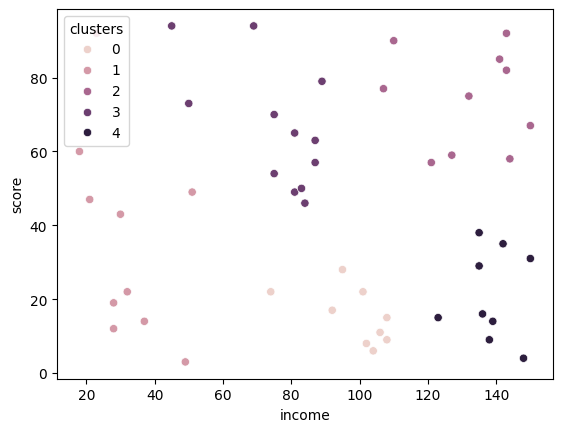

In [22]:
seaborn.scatterplot(x ='income', y='score', hue='clusters', data=df)

In [23]:
from sklearn.cluster import KMeans

In [24]:
K_range = range(1,15)
wcss = []

In [25]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)  #Inertia_ is the sum of squared error for each cluster.

In [26]:
wcss

[122644.90000000002,
 61980.26409017712,
 41440.45319693094,
 27852.595670995666,
 19365.678632478626,
 18150.84090909091,
 11529.166666666668,
 9540.666666666666,
 7966.702777777778,
 8100.777777777777,
 5818.497222222223,
 5507.583333333334,
 4626.091666666667,
 4652.950000000001]

Text(0.5, 1.0, 'Tennis Elbow Courve')

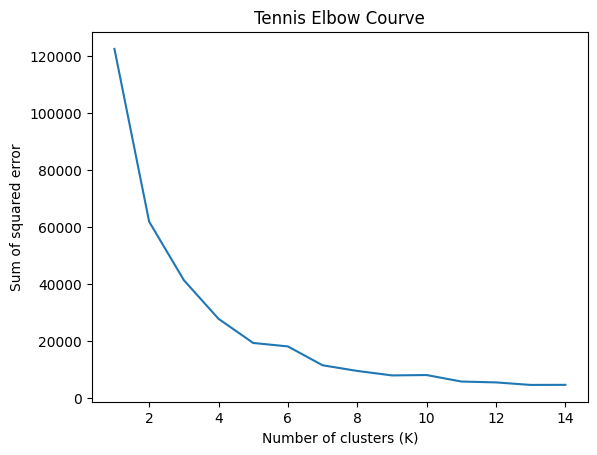

In [27]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)
plt.title('Tennis Elbow Courve')

In [28]:
K_range = range(1,20)
wcss2 = []

In [29]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss2.append(km.inertia_) #Inertia_ is the sum of squared error for each cluster.

In [30]:
wcss2

[51473.60000000001,
 19721.610305958133,
 13701.624009324009,
 8722.742424242424,
 5903.54467754468,
 5047.48611111111,
 3878.7531746031746,
 3415.0420634920633,
 3046.5773809523816,
 2507.757142857143,
 2178.972222222222,
 2273.340476190476,
 1708.4999999999998,
 1463.404761904762,
 1361.0833333333335,
 1145.2499999999998,
 990.3333333333334,
 1189.75,
 861.2738095238096]

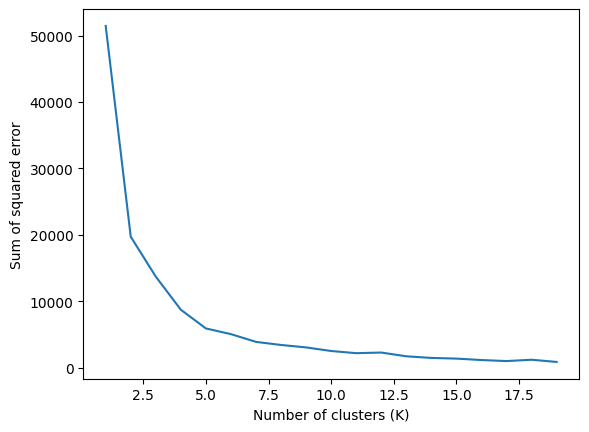

In [31]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2)

In [32]:
kmeans2 = cluster.KMeans(n_clusters = 4)

In [33]:
kmeans2 = kmeans2.fit(df[['age','score']])

In [34]:
kmeans2.cluster_centers_

array([[49.90909091, 50.09090909],
       [60.33333333, 14.11111111],
       [32.52941176, 77.29411765],
       [30.23076923, 18.        ]])

In [35]:
df['age_clusters'] = kmeans2.labels_

In [36]:
df['age_clusters'].value_counts()

,count
age_clusters,
2,17
3,13
0,11
1,9


<Axes: xlabel='age', ylabel='score'>

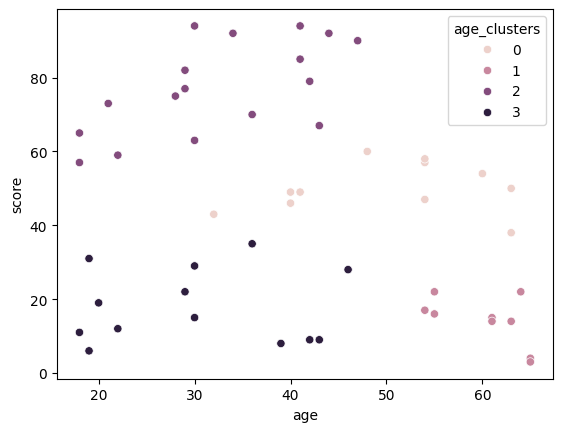

In [37]:
seaborn.scatterplot(x='age', y='score',hue='age_clusters',data=df)